###Sentiment analysis on
##H.P. Lovecraft's *The Shunned House*

For this, we'll use the TextBlob library (http://textblob.readthedocs.org/en/dev/) and pandas (http://pandas.pydata.org/)

In [1]:
from textblob import TextBlob
import pandas as pd
import pylab as plt
import fileinput
import sys
%matplotlib inline

I've already pulled down *The Sunned House* from Project Gutenberg (https://www.gutenberg.org/wiki/Main_Page) and saved it as a text file called 'lovecraft.txt'.  Here we'll load it then define the encoding as utf-8.  Lastly, we'll instantiate a TextBlob object:

In [2]:
with open (r'lovecraft.txt', 'r') as myfile:
    shunned = myfile.read()

ushunned = unicode(shunned, 'utf-8')

tb = TextBlob(ushunned)

The last 120 sentences of the text or so are just legalese that Project Gutenberg has appended to the text, so we'll ignore those 120 sentences when we create out sentence list.

Then we'll go through every sentence in the story and get the 'sentiment' of each one.  Sentiment analysis in TextBlob returns a *polarity* and a *subjectivity* number, which we'll output to a csv:

In [3]:
paragraph = tb.sentences[:-120:]

i = -1
for sentence in paragraph:
    i += 1
    sentiment = sentence.sentiment
    if i == 0:
        write_type = 'w'
        with open('shunned.csv', write_type) as text_file:
            header = 'number,' + 'polarity,' + 'subjectivity\n'
            text_file.write(str(header))
    write_type = 'a'
    with open('shunned.csv', write_type) as text_file:
        newline = str(i) + ',' + str(sentiment) + '\n'
        text_file.write(str(newline))

The TextBlob.sentiment attribute has some extraneous text that we need to remove before we pull the data into pandas:

In [4]:
def replace_all(file, search_exp, replace_exp):
    for line in fileinput.input(file, inplace=1):
        if search_exp in line:
            line = line.replace(search_exp,replace_exp)
        sys.stdout.write(line)

replace_all('shunned.csv', 'Sentiment(polarity=', '')
replace_all('shunned.csv', ' subjectivity=', '')
replace_all('shunned.csv', ')', '')

Now we instantiate a dataframe by pulling in that csv:

In [5]:
df = pd.DataFrame.from_csv('shunned.csv')

Let's plot our data! First let's just look at how the sentiment polarity changes from sentence to sentence:

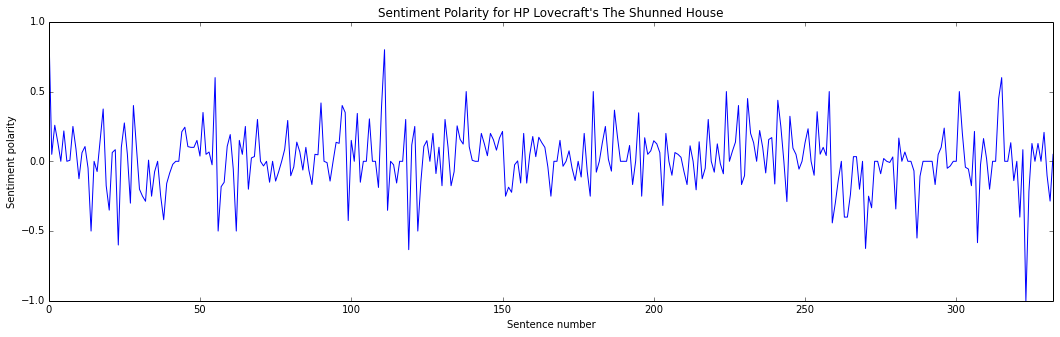

In [6]:
df.polarity.plot(figsize=(18,5), color='b', title='Sentiment Polarity for HP Lovecraft\'s The Shunned House')
plt.xlabel('Sentence number')
plt.ylabel('Sentiment polarity')

Very up and down from sentence to sentence!  Some dark sentences (the ones below 0.0 polarity), some positive sentences (greater than 0.0 polarity) but overall kind of hovers around 0.0 polarity.

One thing that may be interesting to look at is how the senitment changes over the course of the book.  To examine that further, I'm going to create a new column in the dataframe which is the cumulative summation of the polarity rating, using the *cumsum()* pandas method:

In [7]:
df['cum_sum'] = df.polarity.cumsum()

So, now let's plot the results-- How does the sentiment of Lovecraft's story change over the course of the book?

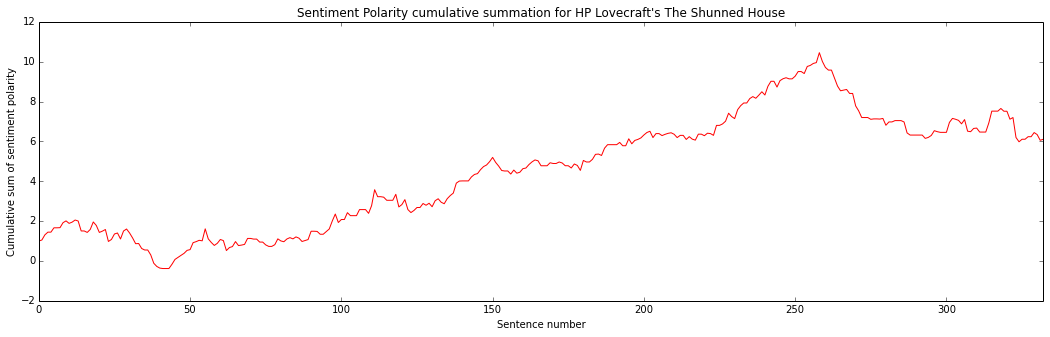

In [8]:
df.cum_sum.plot(figsize=(18,5), color='r', 
                title='Sentiment Polarity cumulative summation for HP Lovecraft\'s The Shunned House')
plt.xlabel('Sentence number')
plt.ylabel('Cumulative sum of sentiment polarity')

What's the dataframe look like?

In [9]:
df.head()

,polarity,subjectivity,cum_sum
number,,,
0,1.000000,1.000000,1.000000
1,0.050000,0.700000,1.050000
2,0.258333,0.650000,1.308333
3,0.136667,0.491667,1.445000
4,0.000000,0.000000,1.445000


Let's get some basic statistical information about sentence seniments:

In [10]:
df.describe()

,polarity,subjectivity,cum_sum
count,333.000000,333.000000,333.000000
mean,0.018333,0.454323,4.497736
std,0.222519,0.264442,2.805573
min,-1.000000,0.000000,-0.380930
25%,-0.077778,0.300000,1.602403
50%,0.000000,0.462500,4.815006
75%,0.133333,0.616667,6.485988
max,1.000000,1.000000,10.451934


For fun, let's just see what TextBlob thinks are the most negatively polar sentences in the short story:

In [11]:
for i in df[df.polarity < -0.5].index:
    print i, tb.sentences[i]

23 There were no
widespread tales of rattling chains, cold currents of air, extinguished
lights, or faces at the window.
119 In this continuous record there seemed to me to brood a
persistent evil beyond anything in nature as I had known it; an evil
clearly connected with the house and not with the family.
270 It was a sense of routine which kept me from going mad.
287 Then gray dawn unfolded wetly from the east,
silhouetting the archaic hill and its venerable steeples, and beckoning
me to the place where my terrible work was still unfinished.
307 With the deepening of the hole, which was
about six feet square, the evil smell increased; and I lost all doubt of
my imminent contact with the hellish thing whose emanations had cursed
the house for over a century and a half.
323 It was unspeakably shocking, and I do not see
how I lived through it.
